In [1]:
import numpy as np
import scipy.stats
import scipy.integrate as integrate
import quadrature_scikit as qs
import matplotlib.pyplot as plt
from scipy.linalg import cholesky, cho_solve, solve_triangular
from scipy.optimize import minimize

In [7]:
def flambda(a):
#     return lambda x: x*0.0+2.0
#     return lambda x: scipy.stats.norm(0, 2.0).pdf(x)
    return lambda x: np.cos(a*x+2)/(1+x**2) + 2
# def prior(a):
#     return 0.0, 1.0
def normal(s):
    return scipy.stats.norm(0, 0.5).pdf(s)


def f(a):
    return integrate.quad(lambda x: flambda(a)(x)*normal(x),np.NINF,np.inf)[0]
    

In [8]:
integrate.quad(lambda x: flambda(1.0)(x)*normal(x),np.NINF,np.inf)

(1.680464328848614, 7.2707235062323516e-09)

In [35]:
minimize(f,0.33)

      fun: 1.727141032633739
 hess_inv: array([[6.97913545]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.06081651e-08])

In [8]:
d.X

array([[ 2.28014461],
       [-8.12682585],
       [-6.87128778],
       [-2.23180089],
       [-6.04166783],
       [ 0.17583453],
       [ 0.17420979],
       [ 0.17360961],
       [ 0.17276235],
       [ 0.1724299 ],
       [ 0.17614516],
       [ 0.17356468],
       [ 0.17873351],
       [ 0.17906575],
       [ 0.17924051],
       [-0.37173281],
       [-0.36963812],
       [-0.36937335],
       [-0.37486325],
       [-0.37510575],
       [-0.30598005],
       [-0.3043439 ],
       [-0.30931554],
       [-0.30362184],
       [-0.31008968],
       [ 0.63844173],
       [ 0.63801424],
       [ 0.63869361],
       [ 0.63670545],
       [ 0.64015944],
       [ 0.70661235],
       [ 0.70532691],
       [ 0.71254518],
       [ 0.70087056],
       [ 0.71262082],
       [-1.06078264],
       [-1.06147458],
       [-1.06165075],
       [-1.05935799],
       [-1.05914006],
       [-1.2094579 ],
       [-1.20960552],
       [-1.20897427],
       [-1.20837132],
       [-1.21072169]])

In [9]:
x = []
y = []
e = []
d= qs.init(flambda(1.0),(np.array([0.0]),np.array([[0.5]])), 200)
print d.mu, d.var
for i in range(50):
    d = qs.extend(flambda(1.0),(np.array([0.0]),np.array([[0.5]])), 20, d)
    print d.mu, d.var
#     x.append(i)
#     y.append(d.mu)
#     e.append(100*d.var)

# plt.clf()
# plt.errorbar(x, y, yerr=e, fmt='o')
# plt.show()

/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00690579]), 'nit': 9, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.03521371]), 'nit': 9, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00072765]), 'nit': 8, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

1.7288896595564438 1.654352860591679e-06


KeyboardInterrupt: 

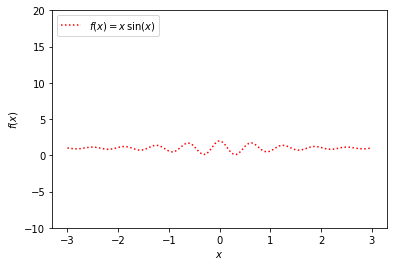

In [23]:
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
y_pred, sigma = d.gp.predict(x, return_std=True)
plt.clf()
fig = plt.figure()
plt.plot(x, flambda(10.0)(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
# plt.plot(d.gp.X_train_, d.gp.y_train_, 'r.', markersize=10, label=u'Observations')
# plt.plot(x, y_pred, 'b-', label=u'Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

In [49]:
datum = d
b,B = (np.array([0.0]),np.array([[1.0]]))
xs = np.atleast_2d(np.linspace(-10,10,1000)).T

In [50]:
n, dim = datum.X.shape
length_scale = datum.gp.kernel_.length_scale
A = length_scale ** 2 * np.diag(np.ones(dim))
I = np.identity(dim)

var_determ = np.linalg.det(2 * np.dot(np.linalg.inv(A), B) + I) ** (-0.5)
determ = np.linalg.det(np.dot(np.linalg.inv(A), B) + I) ** (-0.5)
abinv = np.linalg.inv(A + Bx)
variances = np.zeros((xs.shape[0],1))
for i  in range(xs.shape[0]):
    x = xs[i,:]
    Xnew = np.vstack((datum.gp.X_train_, x))
    K = datum.gp.kernel_(Xnew)
    K[np.diag_indices_from(K)] += datum.gp.alpha
    ztemp = determ * np.exp(-0.5 * np.dot(np.dot((x - b), abinv), (x - b).T))
    ztemp = np.vstack((datum.z, ztemp))
    L = cholesky(K, lower=True)
    Kz = cho_solve((L, True), ztemp)
    variances[i] = var_determ - np.dot(ztemp.T, Kz)



/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00391376]), 'nit': 10, 'funcalls': 101}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.53886996]), 'nit': 5, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.023432]), 'nit': 6, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00292476]), 'nit': 5, 'funcalls': 56}
  " state: %s" % convergence_dict)


-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.76602805e-05]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-5.86360693e-05]), 'nit': 6, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012238]), 'nit': 9, 'funcalls': 115}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  sta

-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.79922827e-05]), 'nit': 7, 'funcalls': 65}
  " state: %s" % convergence_dict)


-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.20891762e-05]), 'nit': 5, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.80439854e-05]), 'nit': 5, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-6.08861446e-05]), 'nit': 7, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  

-1.7894736842105263


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.40143766e-05]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00826314]), 'nit': 6, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0004558]), 'nit': 9, 'funcalls': 104}
  " state: %s" % convergence_dict)


-1.7894736842105263


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00138438]), 'nit': 9, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00064301]), 'nit': 9, 'funcalls': 129}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00018358]), 'nit': 6, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.9473684210526314
0.9473684210526314


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-3.33301723e-05]), 'nit': 8, 'funcalls': 92}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-3.29762697e-05]), 'nit': 7, 'funcalls': 58}
  " state: %s" % convergence_dict)


0.3157894736842106
0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01943863]), 'nit': 3, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00406775]), 'nit': 5, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00042465]), 'nit': 9, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

1.3684210526315788
1.3684210526315788


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00153161]), 'nit': 8, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00070718]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.89184682e-05]), 'nit': 8, 'funcalls': 84}
  " state: %s" % convergence_dict)


1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00902026]), 'nit': 9, 'funcalls': 105}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010226]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)


1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015372]), 'nit': 2, 'funcalls': 45}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00055158]), 'nit': 8, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.25901604e-05]), 'nit': 9, 'funcalls': 94}
  " state: %s" % convergence_dict)


1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00997739]), 'nit': 6, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.49801578e-05]), 'nit': 7, 'funcalls': 95}
  " state: %s" % convergence_dict)


1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00049349]), 'nit': 5, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00651947]), 'nit': 8, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01730848]), 'nit': 8, 'funcalls': 99}
  " state: %s" % convergence_dict)


-1.5789473684210527


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0044943]), 'nit': 5, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([4.15548602e-05]), 'nit': 11, 'funcalls': 106}
  " state: %s" % convergence_dict)


-1.5789473684210527


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00363964]), 'nit': 6, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([1.6450882e-05]), 'nit': 7, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00065321]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00127775]), 'nit': 6, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00084095]), 'nit': 6, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([8.77176062e-05]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)


-1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00113487]), 'nit': 5, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01180881]), 'nit': 4, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02485847]), 'nit': 5, 'funcalls': 59}
  " state: %s" % convergence_dict)


1.3684210526315788


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00195038]), 'nit': 8, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00057324]), 'nit': 5, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-33.86268311]), 'nit': 2, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

1.3684210526315788


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01300054]), 'nit': 8, 'funcalls': 120}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02051683]), 'nit': 6, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02650537]), 'nit': 9, 'funcalls': 117}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-1.368421052631579
-1.368421052631579


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-3.06973782]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00015071]), 'nit': 8, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00078494]), 'nit': 6, 'funcalls': 92}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00026739]), 'nit': 8, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-32.16640104]), 'nit': 1, 'funcalls': 30}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-4.90882817]), 'nit': 4, 'funcalls': 40}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.34157778e-05]), 'nit': 8, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02923283]), 'nit': 9, 'funcalls': 86}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01695179]), 'nit': 6, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00060425]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)


2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00026574]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0001579]), 'nit': 9, 'funcalls': 98}
  " state: %s" % convergence_dict)


-1.5789473684210527


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02461743]), 'nit': 6, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.006153]), 'nit': 7, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00146237]), 'nit': 10, 'funcalls': 137}
  " state: %s" % convergence_dict)


-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00044531]), 'nit': 10, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00069618]), 'nit': 6, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0001599]), 'nit': 6, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.5263157894736841


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00071253]), 'nit': 6, 'funcalls': 70}
  " state: %s" % convergence_dict)


0.5263157894736841


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01673369]), 'nit': 3, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-6.93288166e-05]), 'nit': 6, 'funcalls': 109}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00252673]), 'nit': 7, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

0.9473684210526314


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00096615]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-29.97292811]), 'nit': 1, 'funcalls': 31}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00403397]), 'nit': 5, 'funcalls': 64}
  " state: %s" % convergence_dict)


1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01239202]), 'nit': 5, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00733099]), 'nit': 10, 'funcalls': 122}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03482148]), 'nit': 7, 'funcalls': 63}
  " state: %s" % convergence_dict)


0.9473684210526314


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00074423]), 'nit': 4, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010898]), 'nit': 9, 'funcalls': 111}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01095738]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-1.368421052631579


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.38155142]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00176837]), 'nit': 6, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.52346129e-05]), 'nit': 7, 'funcalls': 117}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

-1.368421052631579


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01944091]), 'nit': 5, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00113896]), 'nit': 9, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.10320398e-05]), 'nit': 8, 'funcalls': 86}
  " state: %s" % convergence_dict)


2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-7.77154928e-05]), 'nit': 10, 'funcalls': 92}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00039271]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00180185]), 'nit': 5, 'funcalls': 60}
  " state: %s" % convergence_dict)


1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00295141]), 'nit': 7, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00088912]), 'nit': 3, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.05517952]), 'nit': 4, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

1.5789473684210522
1.5789473684210522


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([6.01969659e-05]), 'nit': 8, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-4.818663e-05]), 'nit': 8, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00144514]), 'nit': 7, 'funcalls': 78}
  " state: %s" % convergence_dict)


2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([6.59227371e-05]), 'nit': 9, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00116522]), 'nit': 9, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00036502]), 'nit': 10, 'funcalls': 97}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

-0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00043302]), 'nit': 6, 'funcalls': 57}
  " state: %s" % convergence_dict)


-0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([8.46982002e-05]), 'nit': 3, 'funcalls': 47}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00362134]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00751269]), 'nit': 5, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00132135]), 'nit': 9, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-27.81034714]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00716168]), 'nit': 7, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-28.7383621]), 'nit': 3, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00138244]), 'nit': 7, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00010887]), 'nit': 8, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00466084]), 'nit': 9, 'funcalls': 99}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00279725]), 'nit': 8, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00346915]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04980949]), 'nit': 7, 'funcalls': 130}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00013441]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([3.57031822e-05]), 'nit': 8, 'funcalls': 65}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00020945]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)


-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00015688]), 'nit': 7, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00075132]), 'nit': 6, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00039703]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-22.72320782]), 'nit': 2, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00946029]), 'nit': 6, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-54.76782894]), 'nit': 1, 'funcalls': 29}
  " state: %s" % convergence_dict)


-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-4.67896461e-05]), 'nit': 7, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00018042]), 'nit': 7, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-45.98854415]), 'nit': 0, 'funcalls': 21}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

-1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-7.30738975e-05]), 'nit': 7, 'funcalls': 117}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.32811055]), 'nit': 2, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00316617]), 'nit': 7, 'funcalls': 81}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

-1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00169909]), 'nit': 7, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0160207]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00090616]), 'nit': 10, 'funcalls': 100}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.7368421052631575
0.7368421052631575


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01155728]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00297071]), 'nit': 10, 'funcalls': 116}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-8.62525776e-05]), 'nit': 8, 'funcalls': 108}
  " state: %s" % convergence_dict)


1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00518335]), 'nit': 7, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00377513]), 'nit': 8, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([3.38032842e-05]), 'nit': 10, 'funcalls': 89}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00021013]), 'nit': 9, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04149716]), 'nit': 5, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00075769]), 'nit': 6, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00684863]), 'nit': 8, 'funcalls': 118}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00098296]), 'nit': 8, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00091136]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.05200997]), 'nit': 5, 'funcalls': 66}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00074847]), 'nit': 5, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00090065]), 'nit': 5, 'funcalls': 67}
  " state: %s" % convergence_dict)


-2.0


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00022833]), 'nit': 7, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-19.91631508]), 'nit': 1, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01849373]), 'nit': 5, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02061874]), 'nit': 5, 'funcalls': 64}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00018627]), 'nit': 6, 'funcalls': 91}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-6.58637146e-05]), 'nit': 7, 'funcalls': 63}
  " state: %s" % convergence_dict)


1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00619793]), 'nit': 5, 'funcalls': 112}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0003376]), 'nit': 6, 'funcalls': 82}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01235151]), 'nit': 9, 'funcalls': 108}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

1.789473684210526


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.67644155e-05]), 'nit': 8, 'funcalls': 80}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00119279]), 'nit': 6, 'funcalls': 68}
  " state: %s" % convergence_dict)


1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0097625]), 'nit': 7, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00192014]), 'nit': 4, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00131825]), 'nit': 8, 'funcalls': 85}
  " state: %s" % convergence_dict)


1.1578947368421053


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-59.65656531]), 'nit': 1, 'funcalls': 31}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-65.33517611]), 'nit': 1, 'funcalls': 30}
  " state: %s" % convergence_dict)


-0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00095625]), 'nit': 8, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00014859]), 'nit': 10, 'funcalls': 105}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02641173]), 'nit': 5, 'funcalls': 57}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'w

-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0003888]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03071421]), 'nit': 7, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00110003]), 'nit': 8, 'funcalls': 99}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnf

-0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02001441]), 'nit': 9, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-5.8054924e-05]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00029969]), 'nit': 8, 'funcalls': 78}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.96781766e-05]), 'nit': 3, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00268647]), 'nit': 7, 'funcalls': 126}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00690245]), 'nit': 10, 'funcalls': 109}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state:

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00015483]), 'nit': 6, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00048444]), 'nit': 7, 'funcalls': 93}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02282466]), 'nit': 9, 'funcalls': 97}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.10526315789473673
0.10526315789473673


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-5.67507521]), 'nit': 2, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-5.45755029e-05]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00168698]), 'nit': 4, 'funcalls': 55}
  " state: %s" % convergence_dict)


0.10526315789473673


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01613483]), 'nit': 7, 'funcalls': 53}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00029341]), 'nit': 5, 'funcalls': 62}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00019951]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.10526315789473673


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00016882]), 'nit': 6, 'funcalls': 51}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.02803665]), 'nit': 6, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02604301]), 'nit': 6, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-0.9473684210526316


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03355646]), 'nit': 7, 'funcalls': 68}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00139368]), 'nit': 7, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04364014]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

-0.736842105263158
-0.736842105263158


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00017227]), 'nit': 8, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01255291]), 'nit': 9, 'funcalls': 102}
  " state: %s" % convergence_dict)


0.3157894736842106


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00066492]), 'nit': 5, 'funcalls': 69}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.03520138]), 'nit': 10, 'funcalls': 94}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01835821]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

-1.7894736842105263


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([7.08051957e-05]), 'nit': 8, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.76952724e-05]), 'nit': 10, 'funcalls': 102}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-16.35010207]), 'nit': 2, 'funcalls': 36}
  " state: %s" % convergence_dict)


-0.5263157894736843


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00307437]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.64381736e-05]), 'nit': 5, 'funcalls': 63}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01426484]), 'nit': 4, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

-0.5263157894736843


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00997874]), 'nit': 7, 'funcalls': 118}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00232822]), 'nit': 8, 'funcalls': 98}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00077078]), 'nit': 7, 'funcalls': 71}
  " state: %s" % convergence_dict)


-1.5789473684210527


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00088061]), 'nit': 6, 'funcalls': 95}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01537812]), 'nit': 7, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02900489]), 'nit': 5, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-1.5789473684210527


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-2.5655143e-05]), 'nit': 8, 'funcalls': 116}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00039017]), 'nit': 9, 'funcalls': 104}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([2.14634929e-05]), 'nit': 7, 'funcalls': 83}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state

-1.5789473684210527


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00011619]), 'nit': 8, 'funcalls': 59}
  " state: %s" % convergence_dict)


-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00200347]), 'nit': 9, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0027678]), 'nit': 7, 'funcalls': 84}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02853122]), 'nit': 10, 'funcalls': 109}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01916742]), 'nit': 5, 'funcalls': 48}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04099989]), 'nit': 6, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00397635]), 'nit': 8, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00028924]), 'nit': 7, 'funcalls': 73}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00394623]), 'nit': 6, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00063018]), 'nit': 8, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'war

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00533354]), 'nit': 7, 'funcalls': 75}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00080818]), 'nit': 9, 'funcalls': 122}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04054511]), 'nit': 7, 'funcalls': 66}
  " state: %s" % convergence_dict)


-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00608029]), 'nit': 5, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.04280329]), 'nit': 8, 'funcalls': 101}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00071598]), 'nit': 8, 'funcalls': 79}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'wa

-1.7894736842105263


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.0006485]), 'nit': 8, 'funcalls': 76}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-7.92215443]), 'nit': 5, 'funcalls': 88}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.03823853]), 'nit': 6, 'funcalls': 55}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnfl

0.10526315789473673


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.03748577]), 'nit': 6, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00048144]), 'nit': 8, 'funcalls': 91}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.11072938]), 'nit': 5, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

0.10526315789473673


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.82284546e-05]), 'nit': 8, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01114178]), 'nit': 8, 'funcalls': 101}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00032902]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: 

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.1920929e-05]), 'nit': 7, 'funcalls': 52}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.05679739]), 'nit': 7, 'funcalls': 76}
  " state: %s" % convergence_dict)


-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01425167]), 'nit': 5, 'funcalls': 58}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00010422]), 'nit': 8, 'funcalls': 77}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.00081333]), 'nit': 8, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warn

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00064349]), 'nit': 8, 'funcalls': 56}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-9.96589661e-05]), 'nit': 10, 'funcalls': 87}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0211246]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {

-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00168592]), 'nit': 9, 'funcalls': 97}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00014883]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.02245903]), 'nit': 4, 'funcalls': 59}
  " state: %s" % convergence_dict)


-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-1.95503235e-05]), 'nit': 10, 'funcalls': 90}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.01111364]), 'nit': 7, 'funcalls': 74}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00040436]), 'nit': 8, 'funcalls': 88}
  " state: %s" % convergence_dict)


-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([0.01860292]), 'nit': 8, 'funcalls': 130}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.07450487]), 'nit': 5, 'funcalls': 61}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.06609122]), 'nit': 6, 'funcalls': 65}
  " state: %s" % convergence_dict)


-0.10526315789473695


/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.11000329]), 'nit': 5, 'funcalls': 60}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00322843]), 'nit': 10, 'funcalls': 96}
  " state: %s" % convergence_dict)
/Library/Python/2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00311363]), 'nit': 8, 'funcalls': 133}
  " state: %s" % convergence_dict)


{-2.0: <quadrature_scikit.Datum at 0x10686c4d0>,
 -1.7894736842105263: <quadrature_scikit.Datum at 0x106634490>,
 -1.5789473684210527: <quadrature_scikit.Datum at 0x1066d5610>,
 -1.368421052631579: <quadrature_scikit.Datum at 0x106641b50>,
 -1.1578947368421053: <quadrature_scikit.Datum at 0x1066c8450>,
 -0.9473684210526316: <quadrature_scikit.Datum at 0x1067373d0>,
 -0.736842105263158: <quadrature_scikit.Datum at 0x1066e4190>,
 -0.5263157894736843: <quadrature_scikit.Datum at 0x10684bad0>,
 -0.3157894736842106: <quadrature_scikit.Datum at 0x1066d58d0>,
 -0.10526315789473695: <quadrature_scikit.Datum at 0x10686ee90>,
 0.10526315789473673: <quadrature_scikit.Datum at 0x10685ffd0>,
 0.3157894736842106: <quadrature_scikit.Datum at 0x106894f10>,
 0.5263157894736841: <quadrature_scikit.Datum at 0x10683d490>,
 0.7368421052631575: <quadrature_scikit.Datum at 0x10670f790>,
 0.9473684210526314: <quadrature_scikit.Datum at 0x106737fd0>,
 1.1578947368421053: <quadrature_scikit.Datum at 0x106861890

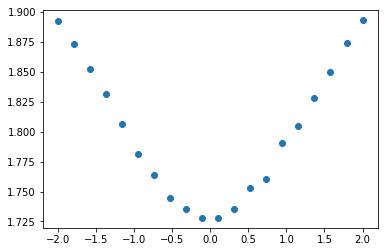

In [3]:
qs.OPT_Rand1D(flambda,(np.array([0.0]),np.array([[1.0]])),100,np.linspace(-2,2,20),20,3,True)

array([[-10.        ],
       [ -9.7979798 ],
       [ -9.5959596 ],
       [ -9.39393939],
       [ -9.19191919],
       [ -8.98989899],
       [ -8.78787879],
       [ -8.58585859],
       [ -8.38383838],
       [ -8.18181818],
       [ -7.97979798],
       [ -7.77777778],
       [ -7.57575758],
       [ -7.37373737],
       [ -7.17171717],
       [ -6.96969697],
       [ -6.76767677],
       [ -6.56565657],
       [ -6.36363636],
       [ -6.16161616],
       [ -5.95959596],
       [ -5.75757576],
       [ -5.55555556],
       [ -5.35353535],
       [ -5.15151515],
       [ -4.94949495],
       [ -4.74747475],
       [ -4.54545455],
       [ -4.34343434],
       [ -4.14141414],
       [ -3.93939394],
       [ -3.73737374],
       [ -3.53535354],
       [ -3.33333333],
       [ -3.13131313],
       [ -2.92929293],
       [ -2.72727273],
       [ -2.52525253],
       [ -2.32323232],
       [ -2.12121212],
       [ -1.91919192],
       [ -1.71717172],
       [ -1.51515152],
       [ -1

In [6]:
np.zeros(5)

array([0., 0., 0., 0., 0.])